<a href="https://colab.research.google.com/github/syedabusafwan/ML-practice/blob/main/DR_mcl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inputs

In [1]:
cl = 4
ep = 50
name = "OnlyDR_Clahe"
lr = 0.0001
batch_size = 8

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! mkdir ~/.kaggle

In [4]:
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download ahmednoorim/aptos19-clahe

Dataset URL: https://www.kaggle.com/datasets/ahmednoorim/aptos19-clahe
License(s): unknown


In [6]:
# prompt: unzip

!unzip aptos19-clahe.zip


Streaming output truncated to the last 5000 lines.
  inflating: Aptos19_Clahe_onlyDR_aug/Aptos19_Clahe_onlyDR_aug/All/train/aug393_Aptos19 1201 Mild DR.png  
  inflating: Aptos19_Clahe_onlyDR_aug/Aptos19_Clahe_onlyDR_aug/All/train/aug393_Aptos19 13 Severe DR.png  
  inflating: Aptos19_Clahe_onlyDR_aug/Aptos19_Clahe_onlyDR_aug/All/train/aug393_Aptos19 2012 Proliferative DR.png  
  inflating: Aptos19_Clahe_onlyDR_aug/Aptos19_Clahe_onlyDR_aug/All/train/aug394_Aptos19 1206 Mild DR.png  
  inflating: Aptos19_Clahe_onlyDR_aug/Aptos19_Clahe_onlyDR_aug/All/train/aug394_Aptos19 1313 Severe DR.png  
  inflating: Aptos19_Clahe_onlyDR_aug/Aptos19_Clahe_onlyDR_aug/All/train/aug394_Aptos19 2015 Proliferative DR.png  
  inflating: Aptos19_Clahe_onlyDR_aug/Aptos19_Clahe_onlyDR_aug/All/train/aug395_Aptos19 1208 Mild DR.png  
  inflating: Aptos19_Clahe_onlyDR_aug/Aptos19_Clahe_onlyDR_aug/All/train/aug395_Aptos19 1366 Severe DR.png  
  inflating: Aptos19_Clahe_onlyDR_aug/Aptos19_Clahe_onlyDR_aug/All/trai

In [7]:
import os
import shutil
import random

# Define the input folder containing your dataset
input_folder = "/content/Aptos19_Clahe_onlyDR_aug/Aptos19_Clahe_onlyDR_aug/Split"  # Change this to your dataset path

# Define the output folder where the split datasets will be saved
output_folder = "/content/splits"  # Change this to your desired output path

# Create output directories for train, val, and test
train_dir = os.path.join(output_folder, "train")
val_dir = os.path.join(output_folder, "val")
test_dir = os.path.join(output_folder, "test")

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Iterate through each class directory in the input folder
for class_name in os.listdir(input_folder):
    class_path = os.path.join(input_folder, class_name)

    if os.path.isdir(class_path):  # Check if it is a directory
        # Get all image files in the class directory
        images = os.listdir(class_path)

        # Shuffle the images randomly
        random.seed(42)  # For reproducibility
        random.shuffle(images)

        # Calculate split indices
        total_images = len(images)
        train_end = int(total_images * 0.7)
        val_end = train_end + int(total_images * 0.15)

        # Split images into train, val, and test sets
        train_images = images[:train_end]
        val_images = images[train_end:val_end]
        test_images = images[val_end:]

        # Create class directories in output folders
        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

        # Copy images to their respective directories
        for img in train_images:
            shutil.copy(os.path.join(class_path, img), os.path.join(train_dir, class_name))

        for img in val_images:
            shutil.copy(os.path.join(class_path, img), os.path.join(val_dir, class_name))

        for img in test_images:
            shutil.copy(os.path.join(class_path, img), os.path.join(test_dir, class_name))

print("Dataset splitting completed.")

Dataset splitting completed.


# Augmentation

In [8]:
train_dir = {
    1: "/content/splits/train/Mild DR",
    2: "/content/splits/train/Moderate DR",
    3: "/content/splits/train/Severe DR",
    4: "/content/splits/train/Proliferative DR",
}

val_dir = {
    1: "/content/splits/val/Mild DR",
    2: "/content/splits/val/Moderate DR",
    3: "/content/splits/val/Severe DR",
    4: "/content/splits/val/Proliferative DR",
}

test_dir = {
    1: "/content/splits/test/Mild DR",
    2: "/content/splits/test/Moderate DR",
    3: "/content/splits/test/Severe DR",
    4: "/content/splits/test/Proliferative DR",
}

In [9]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, save_img
import numpy as np
from PIL import Image
import random

def augmentation(main_directory, type_of_dir = "Unknown", target_count = 0):
    # Step 1: Count and plot the number of images in each folder
    image_counts = {label: len(os.listdir(directory)) for label, directory in main_directory.items()}
    print(f"Image Count: {image_counts}")

    # Plotting
    plt.bar(image_counts.keys(), image_counts.values())
    plt.xlabel('Class Labels')
    plt.ylabel('Number of Images')
    plt.title(f'{type_of_dir} Images Before Augmentation')
    plt.xticks(list(image_counts.keys()), ['Mild', 'Moderate', 'Severe', 'Proliferative'])
    plt.show()


    # Define augmentation parameters
    datagen = ImageDataGenerator(
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=(0.9,1.1),
        fill_mode='constant',
    )

    for label, directory in main_directory.items():
        current_count = image_counts[label]
        print(f"{label} image count: {current_count}")

        # List all images in the directory
        image_files = os.listdir(directory)

        # Set to track augmented images
        augmented_images = set()

        # Calculate remaining count needed to reach target
        rem_count = target_count - current_count

        i = 1
        while rem_count > 0:
            for img_file in image_files:
                # Check if the image has already been augmented
                if img_file in augmented_images:
                    continue

                img_path = os.path.join(directory, img_file)
                img = load_img(img_path)  # Load image
                img_array = img_to_array(img)  # Convert to array

                # Reshape for augmentation (1, height, width, channels)
                img_array = img_array.reshape((1,) + img_array.shape)

                # Generate augmented image
                for batch in datagen.flow(img_array, batch_size=1):
                    aug_img_name = f"aug{i}_{img_file}"  # Create a new name for the augmented image
                    aug_img_path = os.path.join(directory, aug_img_name)
                    save_img(aug_img_path, batch[0])  # Save augmented image

                    # print(f"{aug_img_name} is saved --- REM: {rem_count}")

                    # Mark this image as augmented
                    augmented_images.add(img_file)

                    i += 1
                    rem_count -= 1  # Decrease remaining count
                    break

                if rem_count == 0:
                    break

            # If all images have been augmented once, reset the tracking set
            if rem_count > 0 and len(augmented_images) == len(image_files):
                print(f"All images have been augmented once. Resetting augmentation. --- REM: {rem_count}")
                augmented_images.clear()  # Reset to augment again

        print(f"Augmented {label} to {len(os.listdir(directory))} images.")

    print("---Augmentation process completed---")

    # Set up the number of images to display
    num_images = 10

    # Create a figure to plot the images
    plt.figure(figsize=(15, 10))

    # Loop through each category in test_dir
    for label, folder_path in test_dir.items():
        # List all images in the directory
        all_images = os.listdir(folder_path)

        # Filter for image files (optional, depending on your dataset)
        image_files = [f for f in all_images if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # Randomly select 10 images
        selected_images = random.sample(image_files, min(num_images, len(image_files)))

        # Loop through selected images and plot them
        for i, img_file in enumerate(selected_images):
            img_path = os.path.join(folder_path, img_file)
            img = Image.open(img_path)

            # Create a subplot for each image
            plt.subplot(len(test_dir), num_images, (label - 1) * num_images + i + 1)
            plt.imshow(img)
            plt.axis('off')  # Hide axes
            plt.title(f'Label: {label}')  # Set title as label

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

    # Step 1: Count and plot the number of images in each folder
    image_counts = {label: len(os.listdir(directory)) for label, directory in main_directory.items()}

    # Plotting
    plt.bar(image_counts.keys(), image_counts.values())
    plt.xlabel('Class Labels')
    plt.ylabel('Number of Images')
    plt.title(f'{type_of_dir} Images After Augmentation')
    plt.xticks(list(image_counts.keys()), ['Mild', 'Moderate', 'Severe', 'Proliferative'])
    plt.show()

Image Count: {1: 700, 2: 700, 3: 700, 4: 700}


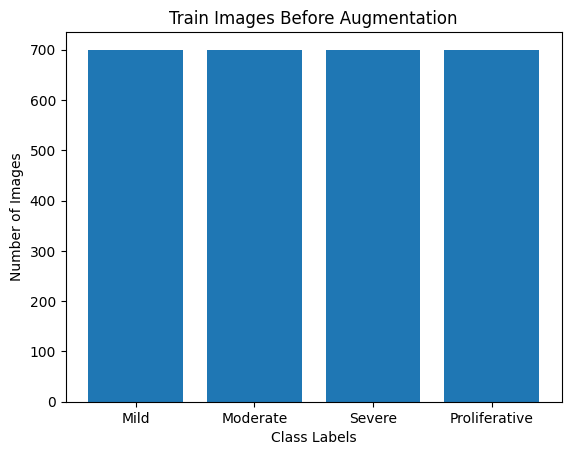

1 image count: 700
Augmented 1 to 700 images.
2 image count: 700
Augmented 2 to 700 images.
3 image count: 700
Augmented 3 to 700 images.
4 image count: 700
Augmented 4 to 700 images.
---Augmentation process completed---


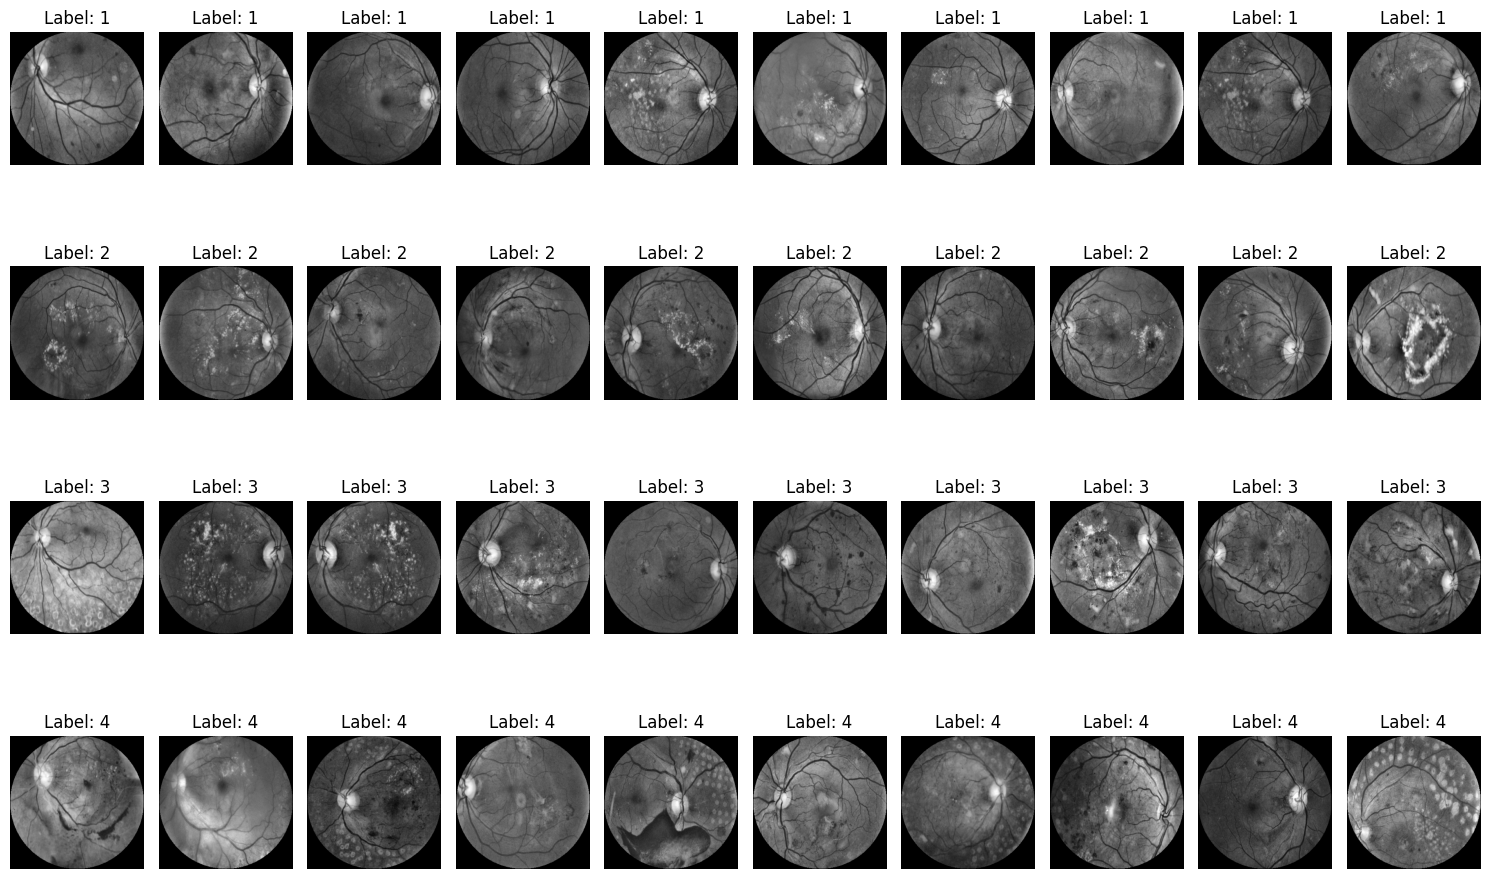

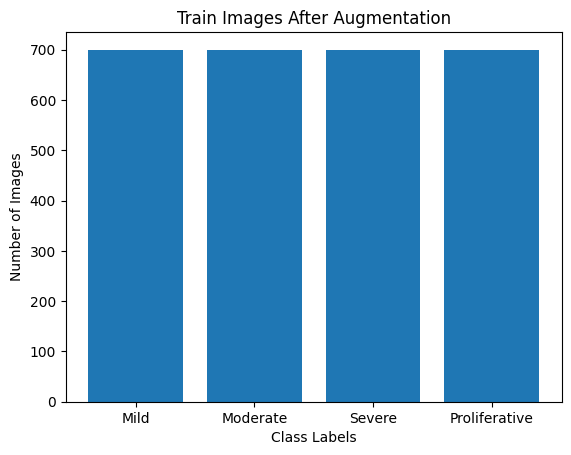

In [10]:
augmentation(type_of_dir="Train", main_directory=train_dir, target_count=700)

Image Count: {1: 150, 2: 150, 3: 150, 4: 150}


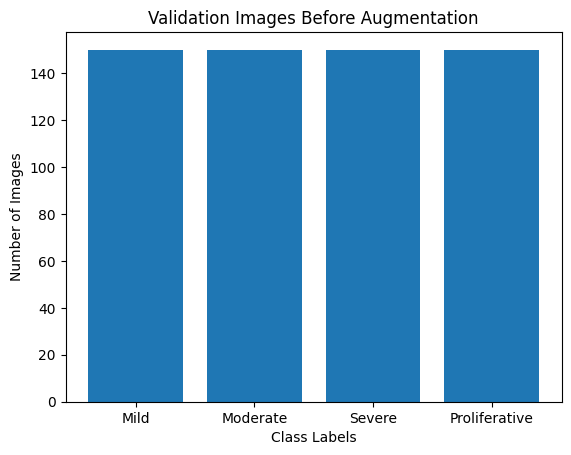

1 image count: 150
Augmented 1 to 150 images.
2 image count: 150
Augmented 2 to 150 images.
3 image count: 150
Augmented 3 to 150 images.
4 image count: 150
Augmented 4 to 150 images.
---Augmentation process completed---


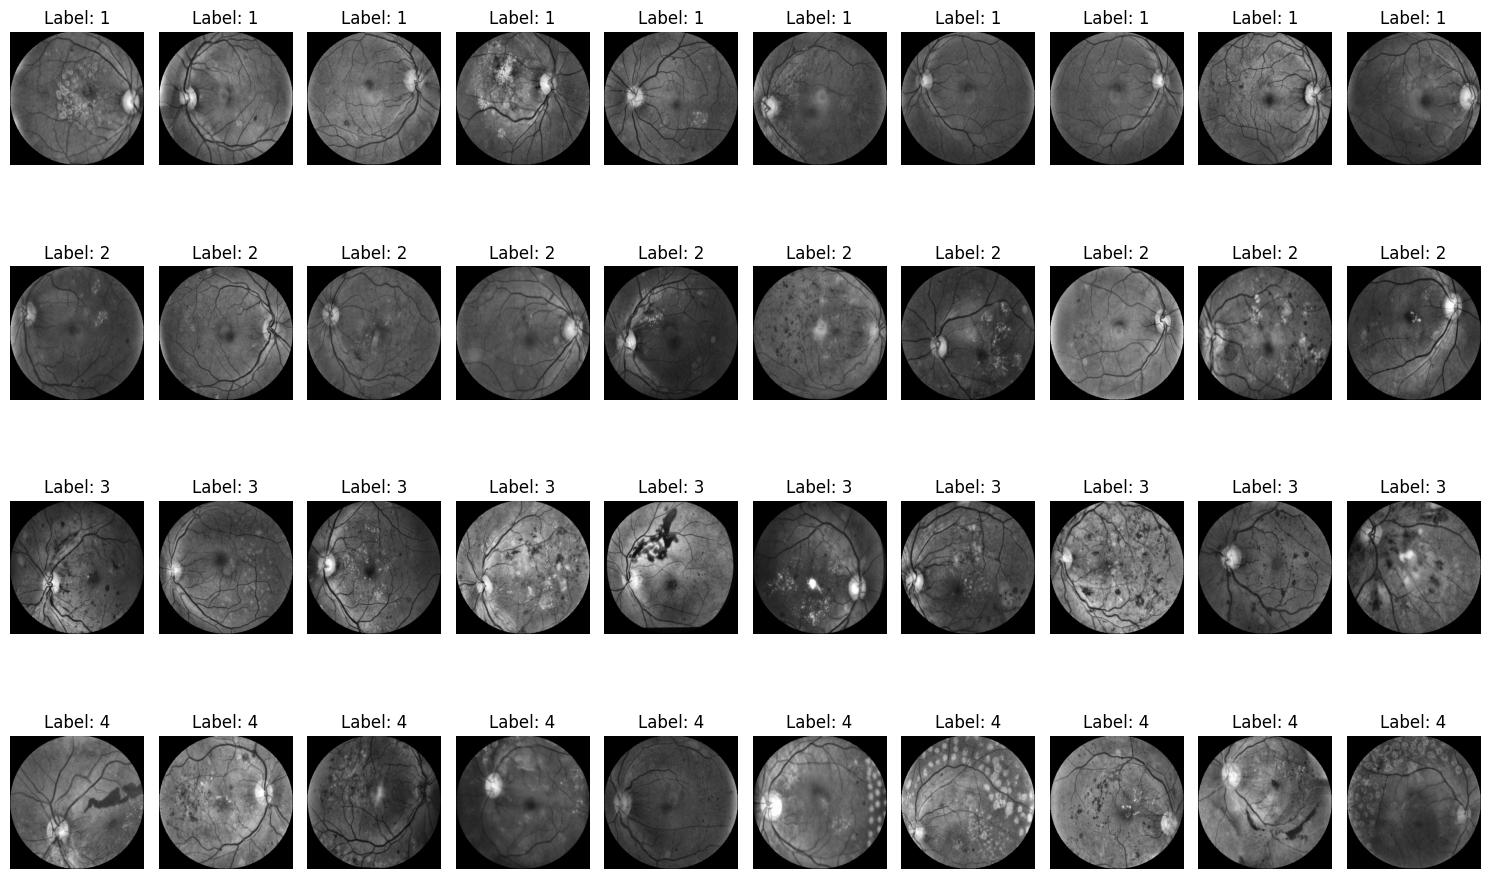

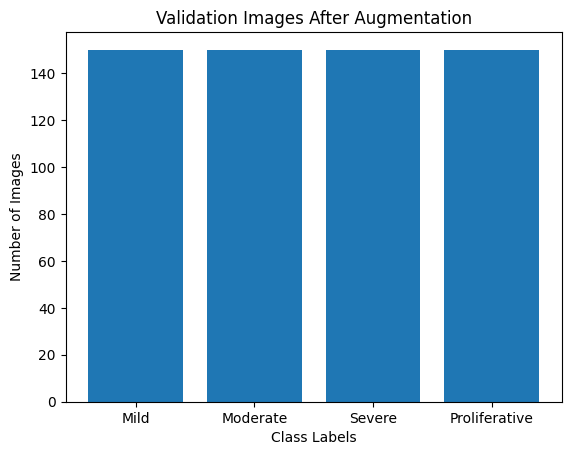

In [11]:
augmentation(type_of_dir="Validation", main_directory=val_dir, target_count=150)

Image Count: {1: 150, 2: 150, 3: 150, 4: 150}


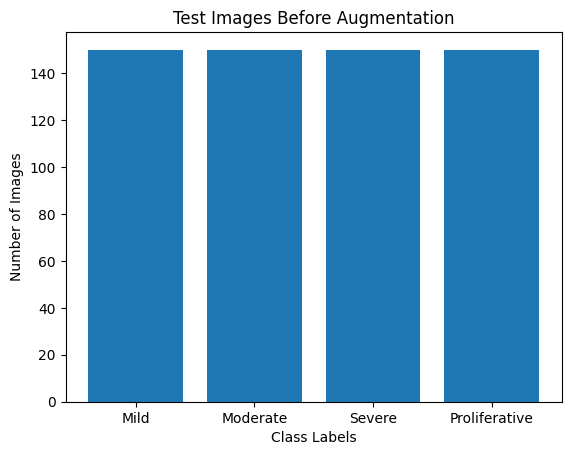

1 image count: 150
Augmented 1 to 150 images.
2 image count: 150
Augmented 2 to 150 images.
3 image count: 150
Augmented 3 to 150 images.
4 image count: 150
Augmented 4 to 150 images.
---Augmentation process completed---


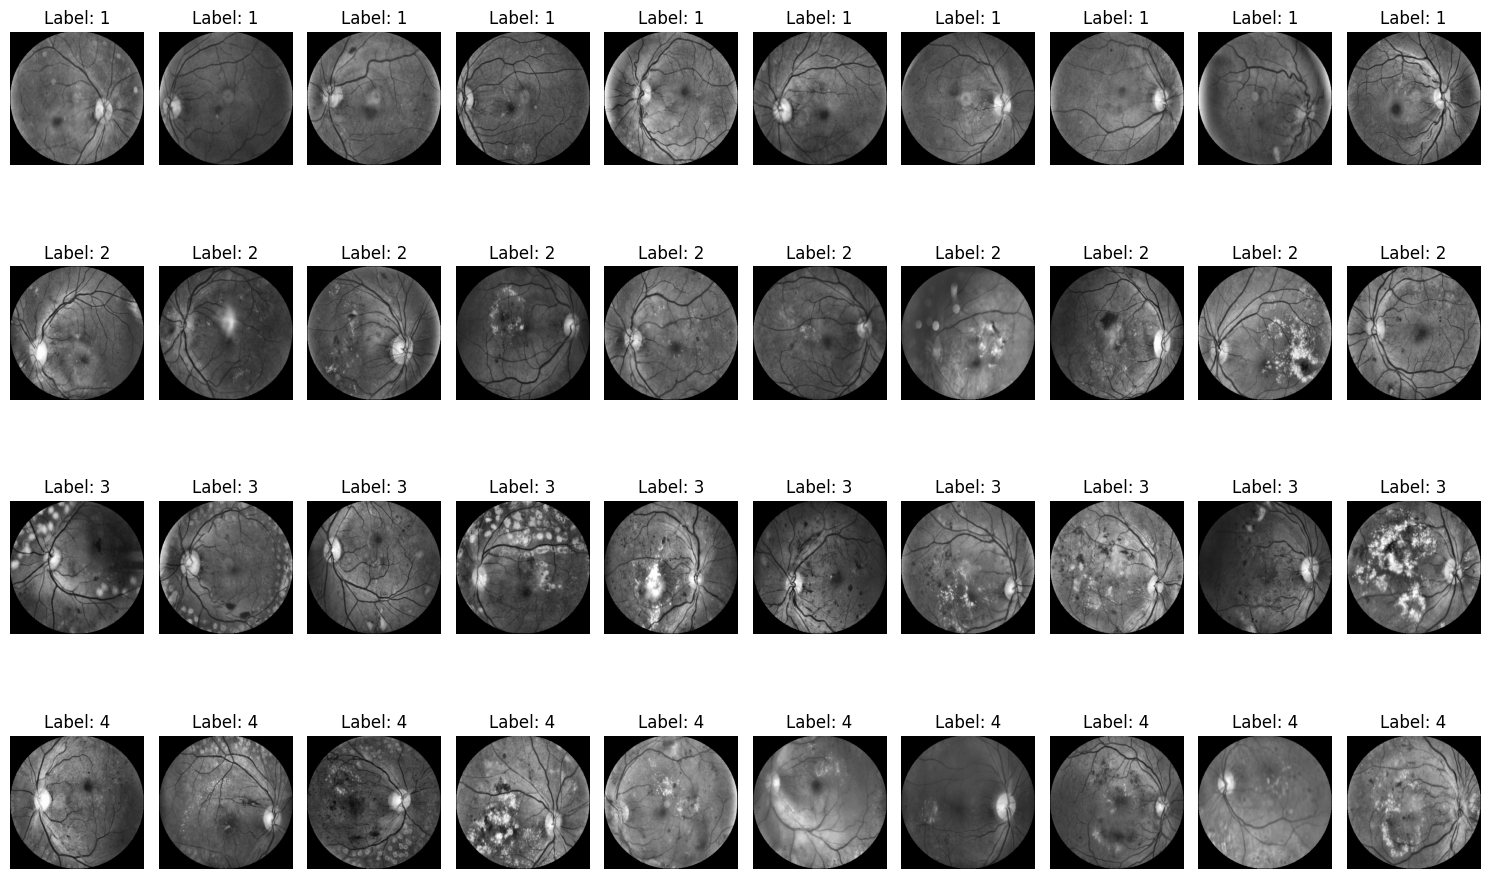

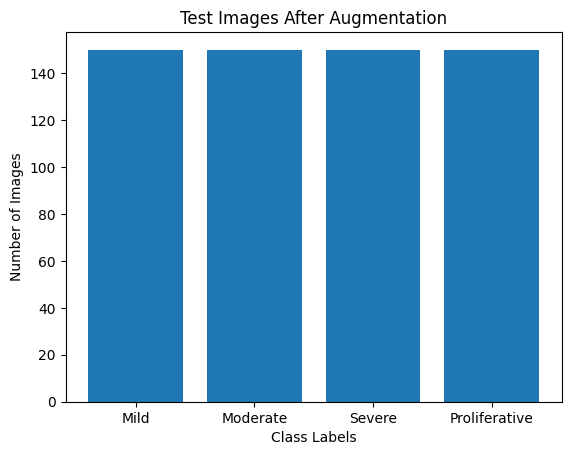

In [12]:
augmentation(type_of_dir="Test", main_directory=test_dir, target_count=150)

# Normalization

In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for training, validation, and test datasets
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    '/content/splits/train',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',  # Automatically one-hot encodes the labels
    color_mode='rgb'
)

# Load validation data
validation_generator = val_datagen.flow_from_directory(
    '/content/splits/val',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',  # Automatically one-hot encodes the labels
    color_mode='rgb'
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    '/content/splits/test',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',  # Automatically one-hot encodes the labels
    shuffle=False,               # Do not shuffle for evaluation
    color_mode='rgb'
)

# Get a batch of training data
x_batch, y_batch = next(train_generator)

# Print the shape of the images
print("Shape of x_batch:", x_batch.shape)

# Print the shape of the labels
print("Shape of y_batch:", y_batch.shape)  # batch_size, number_of_classes

Found 2800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Shape of x_batch: (8, 224, 224, 3)
Shape of y_batch: (8, 4)


# DenseNet121

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Input, Dropout, BatchNormalization, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

# Build a custom DenseNet121 model
def build_model():
    densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))  # Match input shape with data generators
    x = densenet.output
    x = BatchNormalization()(x)  # Correctly apply BatchNormalization
    x = GlobalAveragePooling2D()(x)
    x = Flatten()(x)

    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.50)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.20)(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(cl, activation='softmax')(x)  # Use one output unit for binary classification

    model = Model(inputs=densenet.input, outputs=x)
    model.compile(optimizer=Adam(learning_rate=lr, decay=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

my_model = build_model()

# Train the model
history = my_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=ep  # Adjust number of epochs as needed
)

# Evaluate the model on the test dataset
test_loss, test_accuracy = my_model.evaluate(test_generator)  # Use my_model here
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Save the model using Keras's built-in method (recommended)
my_model.save(f'{name}_Densenet121_e{ep}.h5')  # Save the entire model

print("Model and weights saved.")

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


350/350 ━━━━━━━━━━━━━━━━━━━━ 251s 134ms/step - accuracy: 0.4635 - loss: 1.1883 - val_accuracy: 0.4550 - val_loss: 1.1430
Epoch 2/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 51s 104ms/step - accuracy: 0.6686 - loss: 0.8294 - val_accuracy: 0.6667 - val_loss: 0.8105
Epoch 3/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 42s 108ms/step - accuracy: 0.7958 - loss: 0.5378 - val_accuracy: 0.6483 - val_loss: 0.9651
Epoch 4/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 36s 103ms/step - accuracy: 0.8472 - loss: 0.4037 - val_accuracy: 0.6583 - val_loss: 0.9467
Epoch 5/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 36s 104ms/step - accuracy: 0.8898 - loss: 0.3127 - val_accuracy: 0.7133 - val_loss: 0.8505
Epoch 6/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 37s 105ms/step - accuracy: 0.9279 - loss: 0.2202 - val_accuracy: 0.7317 - val_loss: 1.0022
Epoch 7/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 37s 107ms/step - accuracy: 0.9183 - loss: 0.2365 - val_accuracy: 0.7017 - val_loss: 0.8479
Epoch 8/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 37s 105ms/step - accuracy: 0.9483 - loss: 0.1595 - va